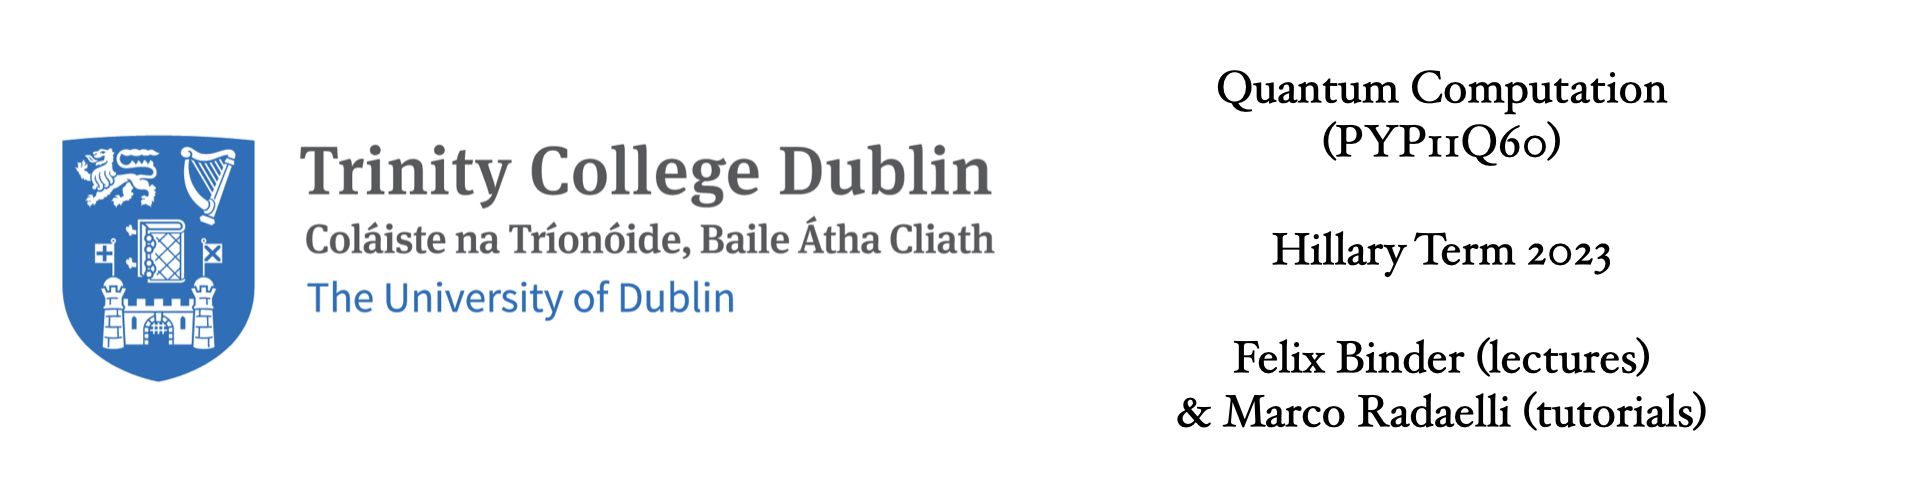

# Problem set 2

## General directions
<ul>
    <li>Some of the following exercises are numerical. They should be performed directly within this notebook. Other exercises are analytical, and should be solved on attached documents. You may submit handwritten solutions for the latter, but please make sure to write in a comprehensible manner.</li>
    <li>For the numerical tasks, please comment your code to explain what does what. Use meaningful names for variables and functions. </li>
    <li>We will need to be able to run the notebook. Make sure that there are no dependencies in the notebook based on files on your computer!</li>
    <li>Feel free to look online for help! Python documentation is <a href="https://docs.python.org/3/">here</a>, NumPy documentation <a href="https://numpy.org/doc/stable/">here</a>, and the Qiskit manual is <a href="https://qiskit.org/documentation/">here</a>. Some specific pages of Qiskit documentation or other useful sources are linked in the relevant questions.</li>
</ul>

$$\newcommand{\ket}[1]{\left|{#1}\right\rangle}$$
$$\newcommand{\bra}[1]{\left\langle{#1}\right|}$$
$$\newcommand{\braket}[2]{\left\langle{#1}\middle|{#2}\right\rangle}$$

# 2.0 - Dependencies
Add all relevant dependencies for the problems to the following cell. Please avoid the <code>import</code> command outside this cell.

In [28]:
import numpy as np
from matplotlib import pyplot as plt
import qiskit
from qiskit import *
from qiskit import Aer
from qiskit.visualization import plot_histogram
from qiskit.visualization import circuit_drawer
from qiskit import IBMQ
import random
from qiskit.providers.fake_provider import FakeMontreal
IBMQ.save_account('0e0b3f421e88cf485cb252626132acf943e16eba9ebd219dd4c1de8ec2b879789400cd0a969906d22b00f045103d9f73c70c25073be31db92a58692a40efe53a')

configrc.store_credentials:WARNING:2023-03-03 11:59:20,732: Credentials already present. Set overwrite=True to overwrite.


# 2.1 - Gate identities (6 pts. total)
When designing quantum circuits, it is often helpful to make use of gate identities. A way of proving such identities is to compare the unitary matrices; you can obtain the unitary matrix corresponding to a circuit in Qiskit using the procedure outlined <a href="https://medium.com/mdr-inc/checking-the-unitary-matrix-of-the-quantum-circuit-on-qiskit-5968c6019a45">here</a>.

## 2.1.a Basic gate identities (2 pts.)
<ol>
    <li>For each of the following questions, create the relevant Qiskit circuits and prove the equivalences by looking at the unitary matrices.
    <ul>
        <li> Express the <code>X</code>-gate in terms of <code>H</code> and <code>Z</code> gates</li>
        <li> Express the <code>CNOT(ij)</code> gate in terms of <code>H</code> gates and <code>CNOT(ji)</code> gates.</li>
        <li> Express the <code>SWAP</code> gate in terms of <code>CNOT</code> gates.</li>
     </ul></li>
    <li>Proof if the <code>CNOT</code> gate can be written in terms of <code>SWAP</code> gates.</li>
</ol>

In [2]:
#We build the equivalent circuit knowing that X = HZH (Nielsen and Chuang(4.18))

circ = QuantumCircuit(1)

#following the steps from the tutorial to prepare the circuit
backend = Aer.get_backend('unitary_simulator')

# HZH
circ.h(0)
circ.z(0)
circ.h(0)

job = execute(circ, backend)
result = job.result()

#print the unitary matrix
print(result.get_unitary(circ, decimals=3))

#Repeat the circuit but now instead HZH we use X to show that they are equivalent
circ = QuantumCircuit(1)

circ.x(0)



backend = Aer.get_backend('unitary_simulator')

job = execute(circ, backend)
result = job.result()

print(result.get_unitary(circ, decimals=3))
print('The matrices are the same')


Operator([[0.+0.j, 1.-0.j],
          [1.+0.j, 0.+0.j]],
         input_dims=(2,), output_dims=(2,))
Operator([[0.+0.j, 1.+0.j],
          [1.+0.j, 0.+0.j]],
         input_dims=(2,), output_dims=(2,))
The matrices are the same


In [3]:
# (Nielsen and Chuang Excercise 4.20), Implementing the circuit below with Handamards and CNOT(j,i)
circ = QuantumCircuit(2)

circ.h(0)
circ.h(1)
circ.cx(1,0)
circ.h(0)
circ.h(1)

job = execute(circ, backend)
result = job.result()
print(result.get_unitary(circ, decimals=3))

#implementing the CNOT(i,j)
circ = QuantumCircuit(2)


circ.cx(0,1)

job = execute(circ, backend)
result = job.result()
print(result.get_unitary(circ, decimals=3))
print('The matrices are the same')

Operator([[ 1.-0.j, -0.+0.j,  0.+0.j,  0.+0.j],
          [-0.+0.j,  0.+0.j,  0.-0.j,  1.-0.j],
          [ 0.+0.j,  0.+0.j,  1.-0.j, -0.+0.j],
          [ 0.-0.j,  1.-0.j, -0.+0.j, -0.+0.j]],
         input_dims=(2, 2), output_dims=(2, 2))
Operator([[1.+0.j, 0.+0.j, 0.+0.j, 0.+0.j],
          [0.+0.j, 0.+0.j, 0.+0.j, 1.+0.j],
          [0.+0.j, 0.+0.j, 1.+0.j, 0.+0.j],
          [0.+0.j, 1.+0.j, 0.+0.j, 0.+0.j]],
         input_dims=(2, 2), output_dims=(2, 2))
The matrices are the same


In [4]:
#(Nielsen and Chuang Figure 1.7) implementing the 3 CNOT circuit
circ = QuantumCircuit(2)

circ.cx(0,1)
circ.cx(1,0)
circ.cx(0,1)

job = execute(circ, backend)
result = job.result()
print(result.get_unitary(circ, decimals=3))

#implementing the SWAP gate
circ = QuantumCircuit(2)

circ.swap(0,1)

job = execute(circ, backend)
result = job.result()
print(result.get_unitary(circ, decimals=3))
print('The matrices are the same')

Operator([[1.+0.j, 0.+0.j, 0.+0.j, 0.+0.j],
          [0.+0.j, 0.+0.j, 1.+0.j, 0.+0.j],
          [0.+0.j, 1.+0.j, 0.+0.j, 0.+0.j],
          [0.+0.j, 0.+0.j, 0.+0.j, 1.+0.j]],
         input_dims=(2, 2), output_dims=(2, 2))
Operator([[1.+0.j, 0.+0.j, 0.+0.j, 0.+0.j],
          [0.+0.j, 0.+0.j, 1.+0.j, 0.+0.j],
          [0.+0.j, 1.+0.j, 0.+0.j, 0.+0.j],
          [0.+0.j, 0.+0.j, 0.+0.j, 1.+0.j]],
         input_dims=(2, 2), output_dims=(2, 2))
The matrices are the same


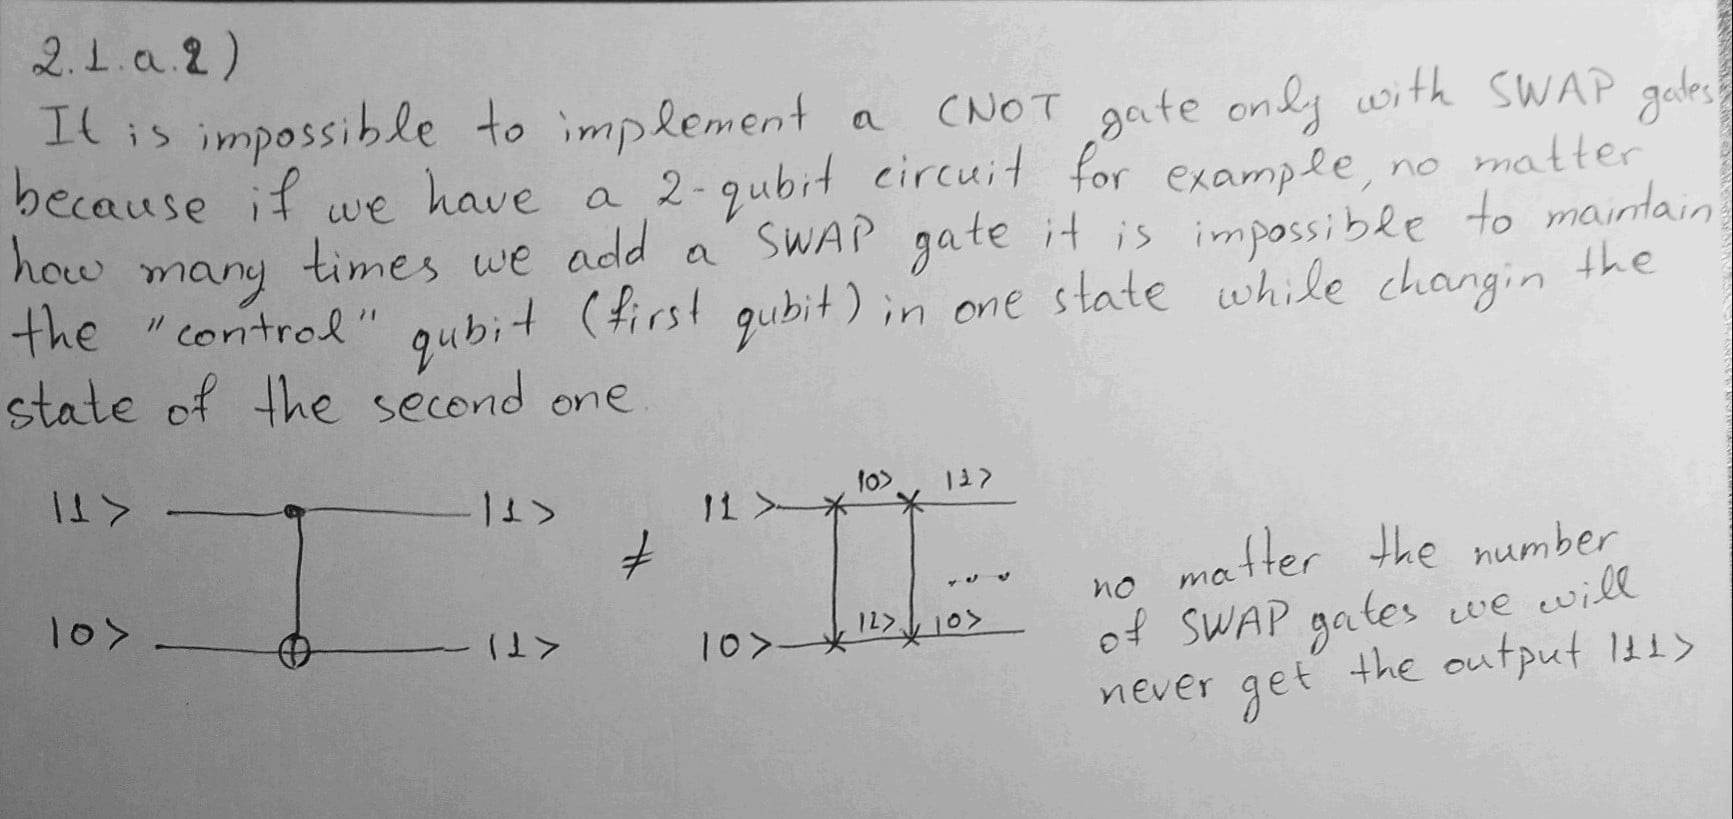

## 2.1.b Universality of quantum gates (4 pts.)
The <it>size</it>  of a quantum circuit refers to the the number of basic quantum gates it contains (i.e., from a given gate set). It is important to note that, in general, the size of a quantum circuit is dependent on the specific choice of the basis gates.

<ol>
  <li>Let $\mathcal{U}$ be a unitary operator acting on a single qubit. Show that the operator $\mathcal{U}$ can be realized using two qubits (and no further ancillas) by a circuit of constant size, over the basis given by the controlled phase-operator <code>CPHASE</code>($\phi$), where $\phi$ can take any real value, and the Hadamard gate <code>H</code>. The <code>CPHASE</code> gate is the controlled version of the <code>PHASE</code> gate, which on its turn has the form:
$$PHASE = \begin{bmatrix}1 & 0 \\ 0 & e^{i\phi}\end{bmatrix}$$ on the computational basis $\{\ket{0}, \ket{1}\}$. 
  </li>
  <li>Let $c\mathcal{U}$ be the controlled version of a generic one-qubit operator $\mathcal{U}$. Prove that $c\mathcal{U}$ can be implemented by a constant size circuit (with no ancillas) with two qubits, over the basis of single-qubit gates and the <code>CNOT</code> gate.
  <li>Let the unitary gate $\mathcal{V}$, acting on $n$ qubits, satisfy $\mathcal{V} \ket{0}^{\otimes n}=\ket{0}^{\otimes n}$, where $\ket{0}^{\otimes n} = \ket{0}\otimes \ket{0} \otimes \ldots \otimes \ket{0}$. Construct a circuit of size $6n+1$ realizing the controlled version $c\mathcal{V}$ of $\mathcal{V}$ on the basis given by $\mathcal{V}$ itself and by the <code>TOFFOLI</code> gate. You can use ancillas, but you should apply $\mathcal{V}$ only once. </li>
</ol>

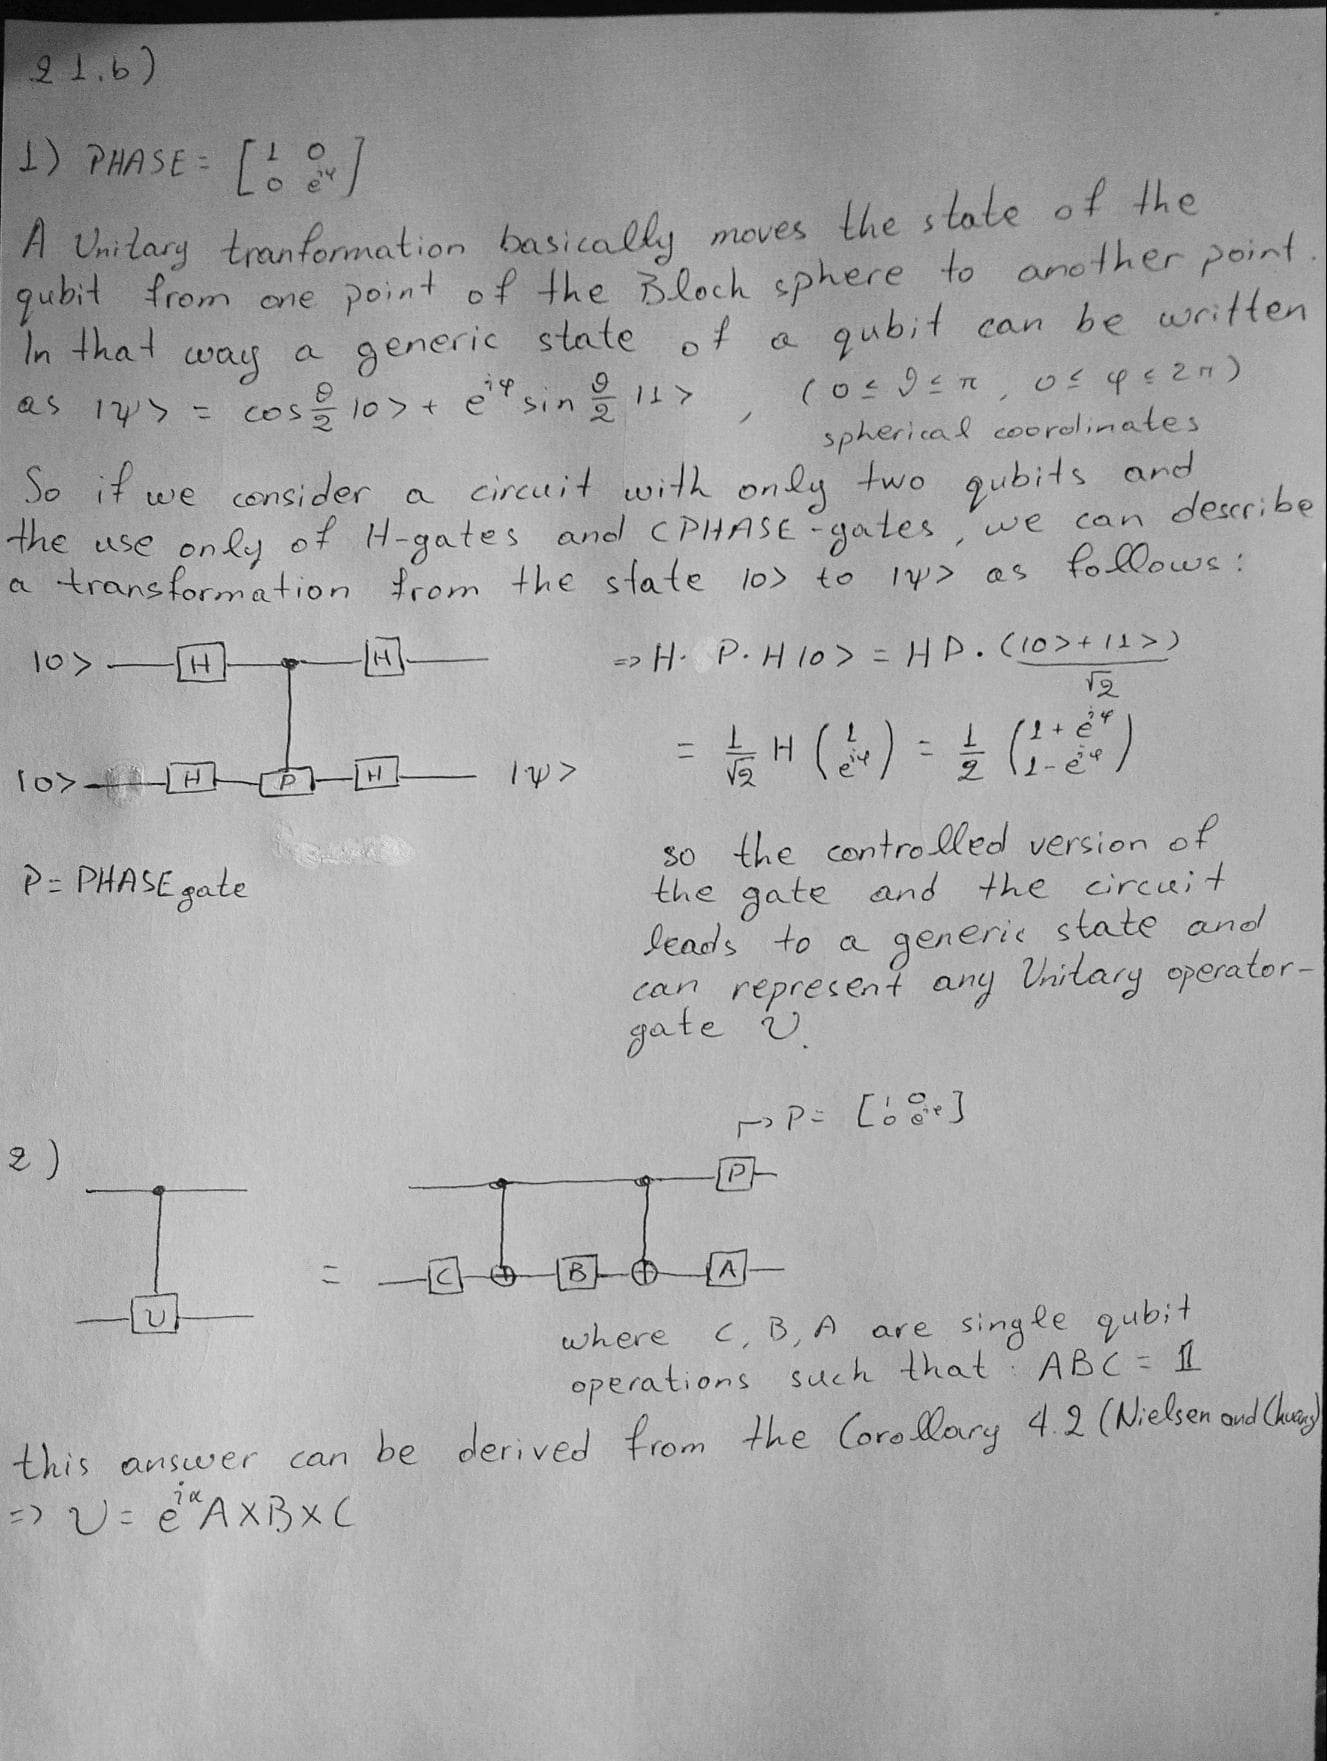

# 2.2 - Quantum Random Walks (10 pts. total + 2 optional)
Quantum random walks can be extremely powerful for modeling various different physical phenomena. In this problem, you will explore so-called <i>discrete-time</i> quantum walks (DTQWs). 

A DTQW is defined on two Hilbert spaces $\mathcal{H}_c \otimes \mathcal{H}_p$. The first Hilbert space represents the degree of freedom of a <i>quantum coin</i>, while the second contains the <i>position</i> of the walker. Consider in particular a walk on a ring of 16 nodes. In this case, $\mathcal{H}_c$ has dimension 2 (two possible directions at each step), while $\mathcal{H}_p$ has dimension 4 (bits necessary to represent numbers from 0 to 15). 

At each step, the walker tosses the coin in order to decide in which direction to go. To do so, they apply a unitary operator $\mathcal{C}$, acting only on the first degree of freedom. Then, they apply a conditional shift operator $\mathcal{S}$, which updates the position according to the result of the coin toss. If $\ket{\uparrow}$ and $\ket{\downarrow}$ are the possible states of the coin, then the conditional shift operator has the form:
$$\mathcal{S} = \ket{\uparrow}\bra{\uparrow} \otimes \mathcal{R} + \ket{\downarrow}\bra{\downarrow} \otimes \mathcal{L}$$
where $\mathcal{L}$ and $\mathcal{R}$ are, respectively, the operator shifting the position to the left, and the operator shifting the position to the right.

The purpose of this exercise is to build a DTQW in Qiskit.

### 2.2.a Incrementer circuit (2 pts.)
The first step is to build the $\mathcal{L}$ and $\mathcal{R}$ operators. Here, the position is encoded in $\mathcal{H}_p$, with basis states $\ket{0},\ldots,\ket{15}$. Therefore, the position can be represented using 4 qubits. The $\mathcal{R}$ operator has to map the basis state $\ket{i}$ onto the basis state $\ket{i+1}$. Conversely, $\mathcal{L}\ket{i} = \ket{i-1}$. 

Since the walk is taking place on a ring, you can impose periodic boundary conditions:
$$\mathcal{L}\ket{0} = \ket{15} \,\,\,\,\, ; \,\,\,\,\, \mathcal{R}\ket{15} = \ket{0}.$$

The $\mathcal{R}$ circuit can be implemented using the circuit

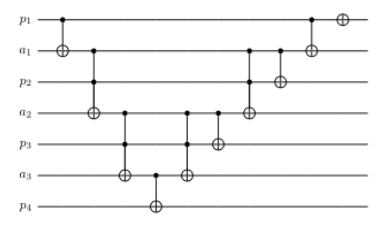

Here, the position is encoded in the qubits labeled $p_1,\ldots,p_4$, while the other qubits, labeled with $a$, are ancillary. 

Create the $\mathcal{R}$ circuit in Qiskit. Plot the diagram of the circuit, and print its $\LaTeX$ source code.

Once you have created your $\mathcal{R}$ operator, turn it into a user-defined gate (see <a href="https://qiskit.org/documentation/stubs/qiskit.circuit.QuantumCircuit.to_gate.html">here</a> for a Qiskit function for his purpose).

In [5]:
Rcirc = QuantumCircuit(7)

Rcirc.cx(0,1)
Rcirc.toffoli(1, 2, 3)
Rcirc.toffoli(3, 4, 5)
Rcirc.cx(5,6)
Rcirc.toffoli(3, 4, 5)
Rcirc.cx(3,4)
Rcirc.toffoli(1, 2, 3)
Rcirc.cx(1,2)
Rcirc.cx(0,1)
Rcirc.x(0)

Rcirc.draw()
#print(circuit_drawer(circ, output='latex_source'))
#according to qiskit this is the command to produce the latex source code but it doesn't run and i cannot understand
#why.

┌───┐
q_0: ──■───────────────────────────────────────■──┤ X ├
     ┌─┴─┐                                   ┌─┴─┐└───┘
q_1: ┤ X ├──■────────────────────────■────■──┤ X ├─────
     └───┘  │                        │  ┌─┴─┐└───┘     
q_2: ───────■────────────────────────■──┤ X ├──────────
          ┌─┴─┐                    ┌─┴─┐└───┘          
q_3: ─────┤ X ├──■─────────■────■──┤ X ├───────────────
          └───┘  │         │  ┌─┴─┐└───┘               
q_4: ────────────■─────────■──┤ X ├────────────────────
               ┌─┴─┐     ┌─┴─┐└───┘                    
q_5: ──────────┤ X ├──■──┤ X ├─────────────────────────
               └───┘┌─┴─┐└───┘                         
q_6: ───────────────┤ X ├──────────────────────────────
                    └───┘

In [6]:
#Turn circuit to a user-defined gate(in this case, a gate named Rgate representing the R operator)
Rgate = Rcirc.to_gate(label='Rgate')

## 2.2.b Decrementer circuit (3 pts.)
From the incrementer circuit, now turn to the decrementer circuit $\mathcal{L}$, which has a very similar structure to $\mathcal{R}$. 

Create the $\mathcal{L}$ circuit, plot its diagram and turn it into a user-defined gate.

In [7]:
#We can assume logically that the L circuit will be the backwards symmetric circuit to the R circuit.
Lcirc = QuantumCircuit(7)

Lcirc.x(0)
Lcirc.cx(0,1)
Lcirc.cx(1,2)
Lcirc.toffoli(1, 2, 3)
Lcirc.cx(3,4)
Lcirc.toffoli(3, 4, 5)
Lcirc.cx(5,6)
Lcirc.toffoli(3, 4, 5)
Lcirc.toffoli(1, 2, 3)
Lcirc.cx(0,1)

Lcirc.draw()

┌───┐                                             
q_0: ┤ X ├──■───────────────────────────────────────■──
     └───┘┌─┴─┐                                   ┌─┴─┐
q_1: ─────┤ X ├──■────■────────────────────────■──┤ X ├
          └───┘┌─┴─┐  │                        │  └───┘
q_2: ──────────┤ X ├──■────────────────────────■───────
               └───┘┌─┴─┐                    ┌─┴─┐     
q_3: ───────────────┤ X ├──■────■─────────■──┤ X ├─────
                    └───┘┌─┴─┐  │         │  └───┘     
q_4: ────────────────────┤ X ├──■─────────■────────────
                         └───┘┌─┴─┐     ┌─┴─┐          
q_5: ─────────────────────────┤ X ├──■──┤ X ├──────────
                              └───┘┌─┴─┐└───┘          
q_6: ──────────────────────────────┤ X ├───────────────
                                   └───┘

In [49]:
#Turning the circuit to a gate named Lgate
Lgate = Lcirc.to_gate(label='Lgate')

## 2.2.c Conditional shift operator (1 pt.)
Using the previously defined $\mathcal{L}$ and $\mathcal{R}$ operators, you will now need to create the conditional shift operator $\mathcal{S}$. This requires conditioning $\mathcal{R}$ and $\mathcal{L}$ on another qubit, which will represent the coin. 

Create the $\mathcal{S}$ circuit using the previously defined $\mathcal{R}$ and $\mathcal{L}$. To learn how to create the controlled version of a unitary gate, you can have a look <a href="https://qiskit.org/documentation/stubs/qiskit.circuit.ControlledGate.html">here</a>.

In [50]:
#creating the control R gate and control L gate
cRgate = Rcirc.to_gate(label='Rgate').control(1)
cLgate = Lcirc.to_gate(label='Lgate').control(1)

#creating the S operator circuit
S = QuantumCircuit(8)
#The shift operator circuit can be implemented by the control L gate, the control R gate and an X gate in between
S.append(cLgate,[0,1,2,3,4,5,6,7])
S.x(0)
S.append(cRgate,[0,1,2,3,4,5,6,7])

S.draw()

┌───┐          
q_0: ────■─────┤ X ├────■─────
     ┌───┴────┐└───┘┌───┴────┐
q_1: ┤0       ├─────┤0       ├
     │        │     │        │
q_2: ┤1       ├─────┤1       ├
     │        │     │        │
q_3: ┤2       ├─────┤2       ├
     │        │     │        │
q_4: ┤3 Lgate ├─────┤3 Rgate ├
     │        │     │        │
q_5: ┤4       ├─────┤4       ├
     │        │     │        │
q_6: ┤5       ├─────┤5       ├
     │        │     │        │
q_7: ┤6       ├─────┤6       ├
     └────────┘     └────────┘

## 2.2.d Step operator (1 pt.)
Combining the conditional shift operator $\mathcal{S}$ and the coin operator $\mathcal{C}$, you can now create the whole step operator. 

As coin operator, in principle one could choose any operator in $SU(2)$. However, it is a very common choice to use the Hadamard operator $H$ for this purpose.

Using the Hadamard gate <code>H</code> as the coin operator, create the step circuit, and turn it into a user-defined gate. 

In [51]:
#implementing the shift circuit to a gate
Sgate = QuantumCircuit.to_gate(S, label='S')

#Step circuit: First using an H gate to the first qubit as a coin operator and then implementing the Sgate to
#determine the direction.
Step = QuantumCircuit(8)
Step.h(0)
Step.append(Sgate,[0,1,2,3,4,5,6,7])

Step.draw()


┌───┐┌────┐
q_0: ┤ H ├┤0   ├
     └───┘│    │
q_1: ─────┤1   ├
          │    │
q_2: ─────┤2   ├
          │    │
q_3: ─────┤3   ├
          │  S │
q_4: ─────┤4   ├
          │    │
q_5: ─────┤5   ├
          │    │
q_6: ─────┤6   ├
          │    │
q_7: ─────┤7   ├
          └────┘

In [52]:
#implementing the step circuit into a gate
Stepgate = QuantumCircuit.to_gate(Step, label='Stepgate')

## 2.2.e Perform a walk (1 pt.)
A walk is composed of a succession of many steps. To create an $n$-step walk, you have to apply the step operator to an initial state $n$ times. Let the initial state be
$$\ket{\psi_0} = \ket{\uparrow} \otimes \ket{3}$$
Create a circuit able to prepare the initial state, then to perform 5 steps of a quantum walk. At the end of the walk, measure all the qubits encoding the position of the walker, and show a histogram of the outcomes.

<b>Note.</b> The outcomes will be, by Qiskit's default behaviour, expressed in binary form. Please translate them into decimal form in order to obtain plot of the position probability distribution after 5 steps.

In [53]:
#impleenting the quantum walk circuit plus four classical bits to use for the measurement
Walk = QuantumCircuit(8,4)
#initializing the state(the first x gate basically acts like the initialization of the coin operator and the first qubit 
#and the second x gate initialize the position which in binary is 0011)
Walk.x(1)
Walk.x(3)
#implementing the 5 steps
for i in range(5):
    Walk.append(Stepgate,[0,1,2,3,4,5,6,7])
#measuring
Walk.measure(1,0)
Walk.measure(3,1)
Walk.measure(5,2)
Walk.measure(7,3)

Walk.draw()

┌───────────┐┌───────────┐┌───────────┐┌───────────┐┌───────────┐   »
q_0: ─────┤0          ├┤0          ├┤0          ├┤0          ├┤0          ├───»
     ┌───┐│           ││           ││           ││           ││           │┌─┐»
q_1: ┤ X ├┤1          ├┤1          ├┤1          ├┤1          ├┤1          ├┤M├»
     └───┘│           ││           ││           ││           ││           │└╥┘»
q_2: ─────┤2          ├┤2          ├┤2          ├┤2          ├┤2          ├─╫─»
     ┌───┐│           ││           ││           ││           ││           │ ║ »
q_3: ┤ X ├┤3          ├┤3          ├┤3          ├┤3          ├┤3          ├─╫─»
     └───┘│  Stepgate ││  Stepgate ││  Stepgate ││  Stepgate ││  Stepgate │ ║ »
q_4: ─────┤4          ├┤4          ├┤4          ├┤4          ├┤4          ├─╫─»
          │           ││           ││           ││           ││           │ ║ »
q_5: ─────┤5          ├┤5          ├┤5          ├┤5          ├┤5          ├─╫─»
          │           ││           ││           ││           ││           │ ║ »
q_6: ─────┤6          ├┤6          ├┤6          ├┤6          ├┤6          ├─╫─»
          │           ││           ││           ││           ││           │ ║ »
q_7: ─────┤7          ├┤7          ├┤7          ├┤7          ├┤7          ├─╫─»
          └───────────┘└───────────┘└───────────┘└───────────┘└───────────┘ ║ »
c: 4/═══════════════════════════════════════════════════════════════════════╩═»
                                                                            0 »
«              
«q_0: ─────────
«              
«q_1: ─────────
«              
«q_2: ─────────
«     ┌─┐      
«q_3: ┤M├──────
«     └╥┘      
«q_4: ─╫───────
«      ║ ┌─┐   
«q_5: ─╫─┤M├───
«      ║ └╥┘   
«q_6: ─╫──╫────
«      ║  ║ ┌─┐
«q_7: ─╫──╫─┤M├
«      ║  ║ └╥┘
«c: 4/═╩══╩══╩═
«      1  2  3

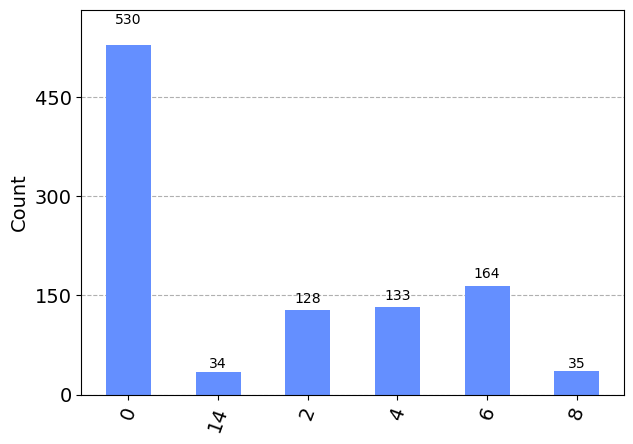

In [54]:
#using the simulator to plot the histogram after 5 steps
aer_sim = Aer.get_backend('aer_simulator')
counts = 10000
statevec_sim = Aer.get_backend('statevector_simulator')
test = transpile(Walk, statevec_sim)
qobj = assemble(test)
results = aer_sim.run(qobj).result()
position = results.get_counts()
#after 5 steps from position 3 the position will be an even number 
position['0'] = position['0000']
del position['0000']

position['2'] = position['0010']
del position['0010']

position['4'] = position['0100']
del position['0100']

position['6'] = position['0110']
del position['0110']

position['8'] = position['1000']
del position['1000']
#exluding positions 10 and 12 because they are unreachable after 5 steps from position 3
#position['10'] = position['1010']
#del position['1010']
#position['12'] = position['1100']
#del position['1100']

position['14'] = position['1110']
del position['1110']

plot_histogram(position)

## 2.2.f Transpiling (2 pts.)
<b>Note.</b> You may want to attempt <a href="#transpiling_exercise">exercise 2.4</a> below before proceeding with this question.

In practice, not all gates are available on a physical quantum computer, depending on its specific technological implementation. However, being able to execute a complete set of quantum gates allows one to perform any quantum calculation. For example, the set composed of the <code>CNOT</code>, the <code>H</code>, and the <code>RZ</code> gate is complete.

Qiskit gives the possibility to rewrite a circuit in terms of a given complete set of gates (Have a look <a href="https://qiskit.org/documentation/stubs/qiskit.compiler.transpile.html">here</a> to learn how to proceed). In Qiskit's jargon, this procedure is called <b>transpiling</b>.

Transpile the step operator on the gates set composed by <code>H</code>, <code>CNOT</code> and <code>RZ</code>, and plot the outcoming circuit.

In [33]:
tr_step = transpile(Step, basis_gates = ['h','cx','rz'])
tr_step.draw()

global phase: π/4
        ┌───┐                                                               »
q_0: ───┤ H ├─────■─────────────────────■────────────────────────────────■──»
        └───┘   ┌─┴─┐                   │                  ┌─────────┐   │  »
q_1: ───────────┤ X ├──■────────────────┼───────────────■──┤ Rz(π/4) ├───┼──»
        ┌───┐   └───┘┌─┴─┐┌──────────┐┌─┴─┐┌─────────┐┌─┴─┐├─────────┴┐┌─┴─┐»
q_2: ───┤ H ├────────┤ X ├┤ Rz(-π/4) ├┤ X ├┤ Rz(π/4) ├┤ X ├┤ Rz(-π/4) ├┤ X ├»
        ├───┤        └───┘└──────────┘└───┘└─────────┘└───┘└──────────┘└───┘»
q_3: ───┤ H ├───────────────────────────────────────────────────────────────»
     ┌──┴───┴──┐                                                            »
q_4: ┤ Rz(π/2) ├────────────────────────────────────────────────────────────»
     └──┬───┬──┘                                                            »
q_5: ───┤ H ├───────────────────────────────────────────────────────────────»
     ┌──┴───┴──┐                                                            »
q_6: ┤ Rz(π/2) ├────────────────────────────────────────────────────────────»
     └──┬───┬──┘                                                            »
q_7: ───┤ H ├───────────────────────────────────────────────────────────────»
        └───┘                                                               »
«                ┌─────────┐                                                   »
«q_0: ─────■─────┤ Rz(π/4) ├───■────────────────■──────────────────────────────»
«        ┌─┴─┐   ├─────────┴┐┌─┴─┐              │                              »
«q_1: ───┤ X ├───┤ Rz(-π/4) ├┤ X ├──────────────┼──────────────────────────────»
«     ┌──┴───┴──┐└──┬───┬───┘└───┘              │                  ┌─────────┐ »
«q_2: ┤ Rz(π/4) ├───┤ H ├──────■────────────────┼───────────────■──┤ Rz(π/4) ├─»
«     └─────────┘   └───┘    ┌─┴─┐┌──────────┐┌─┴─┐┌─────────┐┌─┴─┐├─────────┴┐»
«q_3: ───────────────────────┤ X ├┤ Rz(-π/4) ├┤ X ├┤ Rz(π/4) ├┤ X ├┤ Rz(-π/4) ├»
«                            └───┘└──────────┘└───┘└─────────┘└───┘└──────────┘»
«q_4: ─────────────────────────────────────────────────────────────────────────»
«                                                                              »
«q_5: ─────────────────────────────────────────────────────────────────────────»
«                                                                              »
«q_6: ─────────────────────────────────────────────────────────────────────────»
«                                                                              »
«q_7: ─────────────────────────────────────────────────────────────────────────»
«                                                                              »
«                     ┌─────────┐      ┌───────┐┌─────────┐                 »
«q_0: ──■───────■─────┤ Rz(π/4) ├───■──┤ Rz(0) ├┤ Rz(π/2) ├──■──────────────»
«       │       │     └─────────┘   │  └───────┘└─────────┘  │              »
«q_1: ──┼───────┼───────────────────┼────────────────────────┼──────────────»
«       │     ┌─┴─┐   ┌──────────┐┌─┴─┐                      │              »
«q_2: ──┼─────┤ X ├───┤ Rz(-π/4) ├┤ X ├──────────────────────┼──────────────»
«     ┌─┴─┐┌──┴───┴──┐└──┬───┬───┘└───┘                      │              »
«q_3: ┤ X ├┤ Rz(π/4) ├───┤ H ├───────────────────────────────┼──────────────»
«     └───┘└─────────┘   └───┘                             ┌─┴─┐┌──────────┐»
«q_4: ─────────────────────────────────────────────────────┤ X ├┤ Rz(-π/2) ├»
«                                                          └───┘└──────────┘»
«q_5: ──────────────────────────────────────────────────────────────────────»
«                                                                           »
«q_6: ──────────────────────────────────────────────────────────────────────»
«                                                                           »
«q_7: ──────────────────────────────────────────────────────────────────────»
«                              

## 2.2.g Comparison with a classical walk (2 pts. - optional)
The DTQW is the quantum counterpart of the classical discrete-time random walk. If you are not familiar with classical random walks, this <a href="https://en.wikipedia.org/wiki/Random_walk#One-dimensional_random_walk">Wikipedia page</a> is a good starting place to find out more.

Write a Python script which plots the probability distribution after 5 steps of a classical walk on a 16-ring, with a fair coin, and plot it in the same graph as the DTQW outcomes from above. Comment the similarity and differences.

<b>Note.</b> There are (at least) two possible ways of simulating classical walks. You can use a MonteCarlo approach (many repetitions, based on a random number generator), or a more mathematical perspective employing building the transition matrices for a Markov process. Both approaches are acceptable, but keep in mind that MonteCarlo simulations are affected by simulation errors.

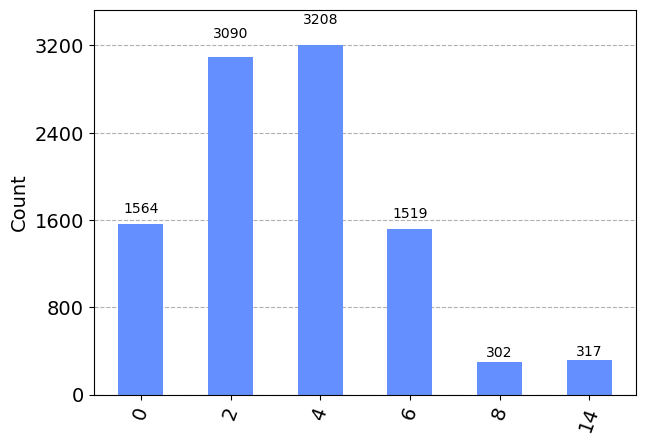

In [14]:
#defining a function for the classical walk
def classical_walk(n):
    x = 0
    y = 3
    pointintime = np.arange(n + 1)
    cposition = [y]
    coin = ["left", "right"]
    for i in range(1, n + 1):
        step = random.choice(coin)
        
        if step == 'left':
            y = y + 1
        elif step == 'right':
            y = y - 1
        
        cposition.append(y)
        endposition = y
    return  endposition

#testing for 10000 counts
n = 10000
cposition = np.zeros(n)
for i in range(n):
    cposition[i] = classical_walk(5)

#plot    
unique, counts = np.unique(cposition, return_counts=True)

plot = dict(zip(unique.astype(int), counts))
    
plot[14] = plot[int(-2)]
del plot[int(-2)]


plot_histogram([plot])
            

In [15]:
#In both quantum and classical walks we see normal probability distribution across the reachable points.
#In quantum walk however we observe that the dominant positions are 0 and 6 which is not the same as classical,
#where the dominant positions are 2 and 4 as we would expect.
#This may be happening because we don't actualy make a measurement in between the steps in the quantum walk.

# 2.3 - Bernstein-Vazirani Algorithm (2 pts.)
Let $a$ be an unknown integer number, $0\leq a \leq 2^n$ and let it be represented in binary form as $a=a_0 a_1 a_2 \ldots a_{n-1}$. Consider the function:
$$
    f(x) = a\cdot x = a_0 x_0 \oplus \ldots \oplus a_{n-1}x_{n-1}. 
$$
Suppose that we are able to apply the function on any $n$-bits input through a suitable black-box oracle $U_f$, working in this way:

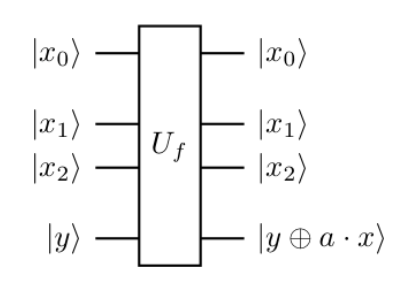

We can determine the value of $a$ by using the Bernstein-Vazirani Algorithm, employing a circuit with the following structure:

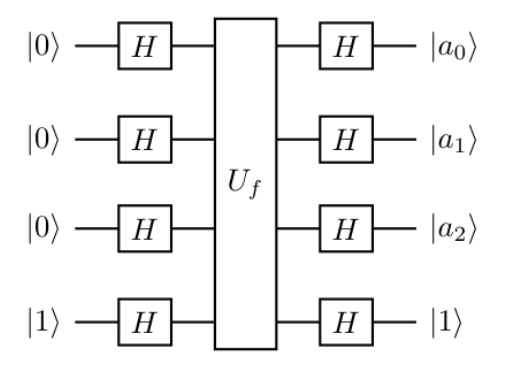

In the next cell, you are given the quantum gate $U_f$, but you do not know the value of $a$. Create a Bernstein-Vazirani circuit, plot it, and by performing suitable measurements retrieve the value of $a$.

In [16]:
oracle = qiskit.QuantumCircuit(4)
oracle.cx(0,3)
oracle.cx(2,3)

In [17]:
bvcirc = QuantumCircuit(4,3)

bvcirc.x(3)
bvcirc.h(0)
bvcirc.h(1)
bvcirc.h(2)
bvcirc.h(3)

bvcirc.cx(0,3)
bvcirc.cx(2,3)

bvcirc.h(0)
bvcirc.h(1)
bvcirc.h(2)
bvcirc.h(3)

bvcirc.measure(0,0)
bvcirc.measure(1,1)
bvcirc.measure(2,2)

bvcirc.draw()

┌───┐          ┌───┐          ┌─┐   
q_0: ┤ H ├───────■──┤ H ├──────────┤M├───
     ├───┤┌───┐  │  └┬─┬┘          └╥┘   
q_1: ┤ H ├┤ H ├──┼───┤M├────────────╫────
     ├───┤└───┘  │   └╥┘      ┌───┐ ║ ┌─┐
q_2: ┤ H ├───────┼────╫────■──┤ H ├─╫─┤M├
     ├───┤┌───┐┌─┴─┐  ║  ┌─┴─┐├───┤ ║ └╥┘
q_3: ┤ X ├┤ H ├┤ X ├──╫──┤ X ├┤ H ├─╫──╫─
     └───┘└───┘└───┘  ║  └───┘└───┘ ║  ║ 
c: 3/═════════════════╩═════════════╩══╩═
                      1             0  2

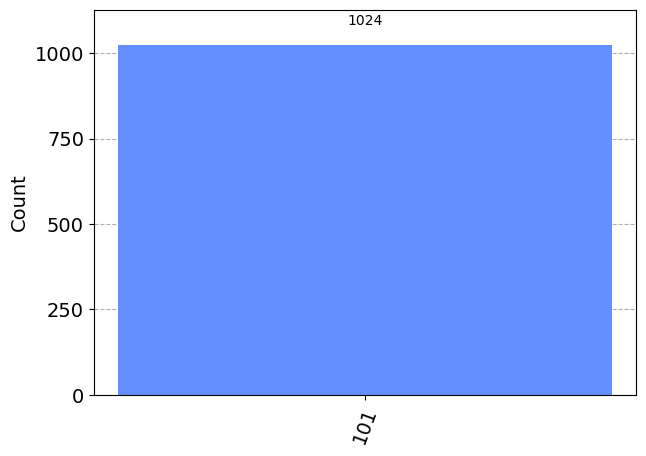

In [47]:
aer_sim = Aer.get_backend('aer_simulator')
shots = 1024
qobj = assemble(bvcirc)
results = aer_sim.run(qobj).result()
answer = results.get_counts()

plot_histogram(answer)


In [19]:
#101 = 5 in binary so a = 5 

Following the example of the given oracle, write a Python script that takes as input a value of $a$ between 0 and 7, and outputs the Qiskit circuit for the relevant oracle, plotting it.

<a id="transpiling_exercise"></a>
# 2.4 - Transpiling (4 pts. total)

In order to transform a circuit from its theoretical form to something applicable on a specific, real-world quantum computer we need to **transpile** it. Thereby we take into account:
<ul>
    <li>the gates available on the computer we want to consider;</li>
    <li>the <it>topology</it> of the computer, i.e. which qubits can interact with which.</li>
</ul>
In general, transpiling a quantum circuit is not simple at all, and it is usually left to automatic calculators. In this exercise, we will mimick the transpiling procedure, to exploit some interesting relations among quantum gates.

## 2.4.a Change of basis gates (1 pt.)
In the following cell, a simple quantum circuit, involving four qubits, is defined in terms of <code>CNOT</code> gates and <code>H</code> gates. Rewrite the circuit in terms of <code>CZ</code> and <code>H</code> gates. 

<b>Note.</b> This part of the exercise should be perfomed manually, and carefully justified step by step.

In [20]:
circuit = qiskit.QuantumCircuit(4,4)
circuit.cx(1,2)
circuit.cx(0,1)
circuit.h(2)
circuit.cx(0,3)
circuit.measure(0,0)
circuit.measure(1,1)
circuit.measure(2,2)
circuit.measure(3,3)
circuit.draw()

┌─┐   
q_0: ───────■────■────────┤M├───
          ┌─┴─┐  │  ┌─┐   └╥┘   
q_1: ──■──┤ X ├──┼──┤M├────╫────
     ┌─┴─┐├───┤  │  └╥┘┌─┐ ║    
q_2: ┤ X ├┤ H ├──┼───╫─┤M├─╫────
     └───┘└───┘┌─┴─┐ ║ └╥┘ ║ ┌─┐
q_3: ──────────┤ X ├─╫──╫──╫─┤M├
               └───┘ ║  ║  ║ └╥┘
c: 4/════════════════╩══╩══╩══╩═
                     1  2  0  3

In [21]:
#from question 1 we saw that Z = HXH so we will replace those gates with the equivalent
tcirc = qiskit.QuantumCircuit(4,4)

tcirc.h(2)
tcirc.cz(1,2)
tcirc.h(2)
tcirc.h(1)
tcirc.cz(0,1)
tcirc.h(1)
tcirc.h(2)
tcirc.h(3)
tcirc.cz(0,3)
tcirc.h(3)

tcirc.measure(0,0)
tcirc.measure(1,1)
tcirc.measure(2,2)
tcirc.measure(3,3)

tcirc.draw()

┌─┐      
q_0: ───────────────■────────■──────┤M├──────
             ┌───┐  │  ┌───┐ │      └╥┘┌─┐   
q_1: ──────■─┤ H ├──■──┤ H ├─┼───────╫─┤M├───
     ┌───┐ │ ├───┤┌───┐└┬─┬┘ │       ║ └╥┘   
q_2: ┤ H ├─■─┤ H ├┤ H ├─┤M├──┼───────╫──╫────
     ├───┤   └───┘└───┘ └╥┘  │ ┌───┐ ║  ║ ┌─┐
q_3: ┤ H ├───────────────╫───■─┤ H ├─╫──╫─┤M├
     └───┘               ║     └───┘ ║  ║ └╥┘
c: 4/════════════════════╩═══════════╩══╩══╩═
                         2           0  1  3

## 2.4.b Verification of the new circuit (1 pt.)
Now, code and plot the circuit you obtained in Qiskit. Insert measurement operations in both the "old" and the "new" circuit, and show that they give equivalent outcomes.

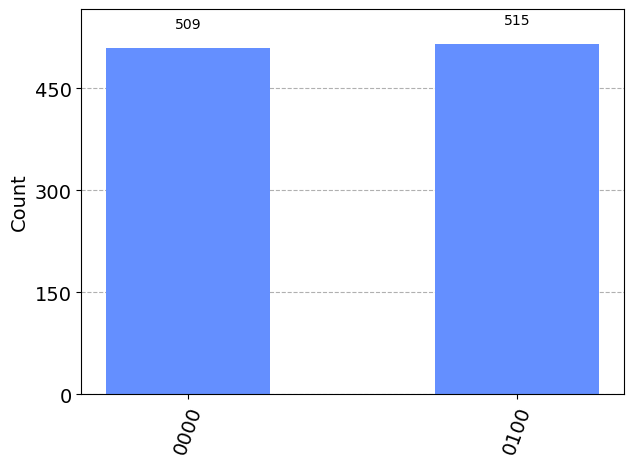

In [22]:
aer_sim = Aer.get_backend('aer_simulator')
shots = 10000
qobj = assemble(circuit)
results = aer_sim.run(qobj).result()
counts = results.get_counts()

plot_histogram(counts)

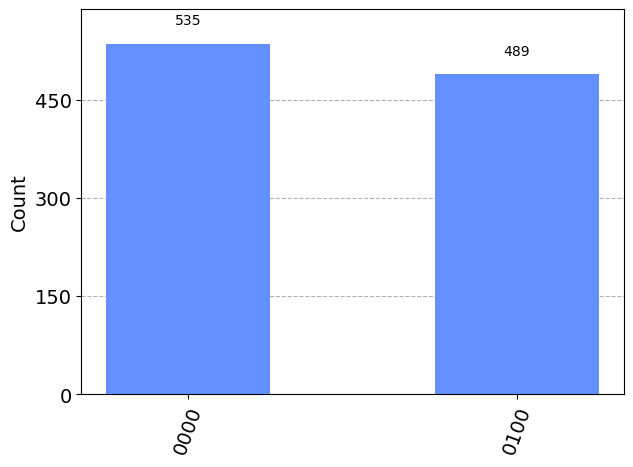

In [23]:
aer_sim = Aer.get_backend('aer_simulator')
shots = 10000
qobj = assemble(tcirc)
results = aer_sim.run(qobj).result()
counts = results.get_counts()

plot_histogram(counts)

In [24]:
#We see that the probabiblity is in both cases 50% and the circuits are equivalent

## 2.4.c Topology/1 (1 pt.)
In the following cell, the basis gates and the adjacency matrix for the IBM quantum computer Nairobi are shown. Using the automatic methods provided by Qiskit, transpile the circuit defined in the previous exercise, in order to make it executable with the available gates and topology. See <a href="https://qiskit.org/documentation/stubs/qiskit.compiler.transpile.html">here</a> for some documentation about the automatic transpiling function. Plot the resulting circuit.

In [26]:
basis_gates = ["cx", "id", "rz", "sx", "x"]
adjacency_matrix = [[0,1],[1,0],[1,2],[2,1],[1,3],[3,1],[3,5],[5,3],[4,5],[5,4],[5,6],[6,5]]

tr_circ = transpile(circuit, basis_gates = basis_gates, coupling_map = adjacency_matrix)
tr_circ.draw()

global phase: π/4
                                                              
ancilla_0 -> 0 ───────────────────────────────────────────────
                               ┌───┐      ┌─┐                 
      q_1 -> 1 ──■─────────────┤ X ├──────┤M├─────────────────
               ┌─┴─┐┌─────────┐└─┬─┘┌────┐└╥┘┌─────────┐   ┌─┐
      q_2 -> 2 ┤ X ├┤ Rz(π/2) ├──┼──┤ √X ├─╫─┤ Rz(π/2) ├───┤M├
               └───┘└─────────┘  │  └────┘ ║ └───┬─┬───┘   └╥┘
      q_0 -> 3 ──────────────────■────■────╫─────┤M├────────╫─
                                      │    ║     └╥┘        ║ 
ancilla_1 -> 4 ───────────────────────┼────╫──────╫─────────╫─
                                    ┌─┴─┐  ║      ║     ┌─┐ ║ 
      q_3 -> 5 ─────────────────────┤ X ├──╫──────╫─────┤M├─╫─
                                    └───┘  ║      ║     └╥┘ ║ 
ancilla_2 -> 6 ────────────────────────────╫──────╫──────╫──╫─
                                           ║      ║      ║  ║ 
          c: 4/════════════════════════════╩══════╩══════╩══╩═
                                           1      0      3  2

## 2.4.d Topology/2 (1 pt.)
Using your IBMq account, you have direct and automatic access to the datasheet of all the freely available IBM quantum computers. Exploting the <code>backend</code> argument of the <code>transpile</code> function (or directly IBMq website), transpile the circuit in such a way that it is executable on the backend <code>ibmq_montreal</code>. Draw the corresponding circuit. By looking at the topology and the available gates on <code>ibmq_montreal</code>, comment on analogies and differences from the circuit obtained in the previous exercise.

In [48]:
#Because we don't have access to IBMq_montreal, I will use the FakeMontreal exploiting the same topology
backend_sim = FakeMontreal()
tr_circ_mon = transpile(circuit, backend_sim)

tr_circ_mon.draw()

global phase: π/4
                                                              
  ancilla_0 -> 0 ─────────────────────────────────────────────
                                                              
  ancilla_1 -> 1 ─────────────────────────────────────────────
                                                              
  ancilla_2 -> 2 ─────────────────────────────────────────────
                                                              
  ancilla_3 -> 3 ─────────────────────────────────────────────
                                                              
  ancilla_4 -> 4 ─────────────────────────────────────────────
                                 ┌───┐                  ┌─┐   
        q_3 -> 5 ────────────────┤ X ├──────────────────┤M├───
                                 └─┬─┘                  └╥┘   
  ancilla_5 -> 6 ──────────────────┼─────────────────────╫────
                                   │                     ║    
  ancilla_6 -> 7 ──────────────────┼─────────────────────╫────
                                   │                 ┌─┐ ║    
        q_0 -> 8 ──────────■───────■─────────────────┤M├─╫────
                           │                         └╥┘ ║    
  ancilla_7 -> 9 ──────────┼──────────────────────────╫──╫────
                           │                          ║  ║    
 ancilla_8 -> 10 ──────────┼──────────────────────────╫──╫────
                         ┌─┴─┐         ┌─┐            ║  ║    
       q_1 -> 11 ──■─────┤ X ├─────────┤M├────────────╫──╫────
                   │     └───┘         └╥┘            ║  ║    
 ancilla_9 -> 12 ──┼────────────────────╫─────────────╫──╫────
                   │                    ║             ║  ║    
ancilla_10 -> 13 ──┼────────────────────╫─────────────╫──╫────
                 ┌─┴─┐┌─────────┐┌────┐ ║ ┌─────────┐ ║  ║ ┌─┐
       q_2 -> 14 ┤ X ├┤ Rz(π/2) ├┤ √X ├─╫─┤ Rz(π/2) ├─╫──╫─┤M├
                 └───┘└─────────┘└────┘ ║ └─────────┘ ║  ║ └╥┘
ancilla_11 -> 15 ───────────────────────╫─────────────╫──╫──╫─
                                        ║             ║  ║  ║ 
ancilla_12 -> 16 ───────────────────────╫─────────────╫──╫──╫─
                                        ║             ║  ║  ║ 
ancilla_13 -> 17 ───────────────────────╫─────────────╫──╫──╫─
                                        ║             ║  ║  ║ 
ancilla_14 -> 18 ───────────────────────╫─────────────╫──╫──╫─
                                        ║             ║  ║  ║ 
ancilla_15 -> 19 ───────────────────────╫─────────────╫──╫──╫─
                                        ║             ║  ║  ║ 
ancilla_16 -> 20 ───────────────────────╫─────────────╫──╫──╫─
                                        ║             ║  ║  ║ 
ancilla_17 -> 21 ───────────────────────╫─────────────╫──╫──╫─
                                        ║             ║  ║  ║ 
ancilla_18 -> 22 ───────────────────────╫─────────────╫──╫──╫─
                                        ║             ║  ║  ║ 
ancilla_19 -> 23 ───────────────────────╫─────────────╫──╫──╫─
                                        ║             ║  ║  ║ 
ancilla_20 -> 24 ───────────────────────╫─────────────╫──╫──╫─
                                        ║             ║  ║  ║ 
ancilla_21 -> 25 ───────────────────────╫─────────────╫──╫──╫─
                                        ║             ║  ║  ║ 
ancilla_22 -> 26 ───────────────────────╫─────────────╫──╫──╫─
                                        ║             ║  ║  ║ 
            c: 4/═══════════════════════╩═════════════╩══╩══╩═
                                        1             0  3  2

In [30]:
#Observing the two circuits we notice that the type and the amount of gates that are being used is the same.
#However due to the bigger amount of qubits and ancillas of the ibmq_montreal the architecture is different.

# 2.5 Measuring an operator (3 pts.)
Let $\mathcal{U}$ be a single qubit operator, which is both Hermitian and unitary. That is, $\mathcal{U}$ can be seen both as an observable and as a quantum gate. 
<ol>
    <li>Prove that the only possible eigenvalues of $\mathcal{U}$ are $\pm 1$.
    <li>Suppose in particular that $\mathcal{U}$ has exactly one eigenvalue equal to $1$ and exactly one eigenvalue equal to $-1$. Consider the circuit drawn in figure below and prove that, for any input state $\ket{\psi_{in}}$, it "measures" $\mathcal{U}$, i.e.:
        <ul>
            <li>the output state $\ket{\psi_{out}}$ is an eigenstate of $\mathcal{U}$;</li>
            <li>the outcome of the measurement (on the computational basis) on the first qubit can be bijectively mapped onto the eigenvalue corresponding to the eigenstate $\ket{\psi_{out}}$</li>
        </ul>
 </ol>
 
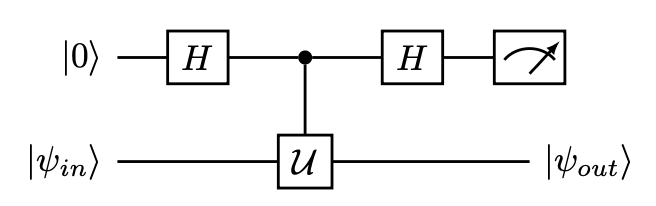

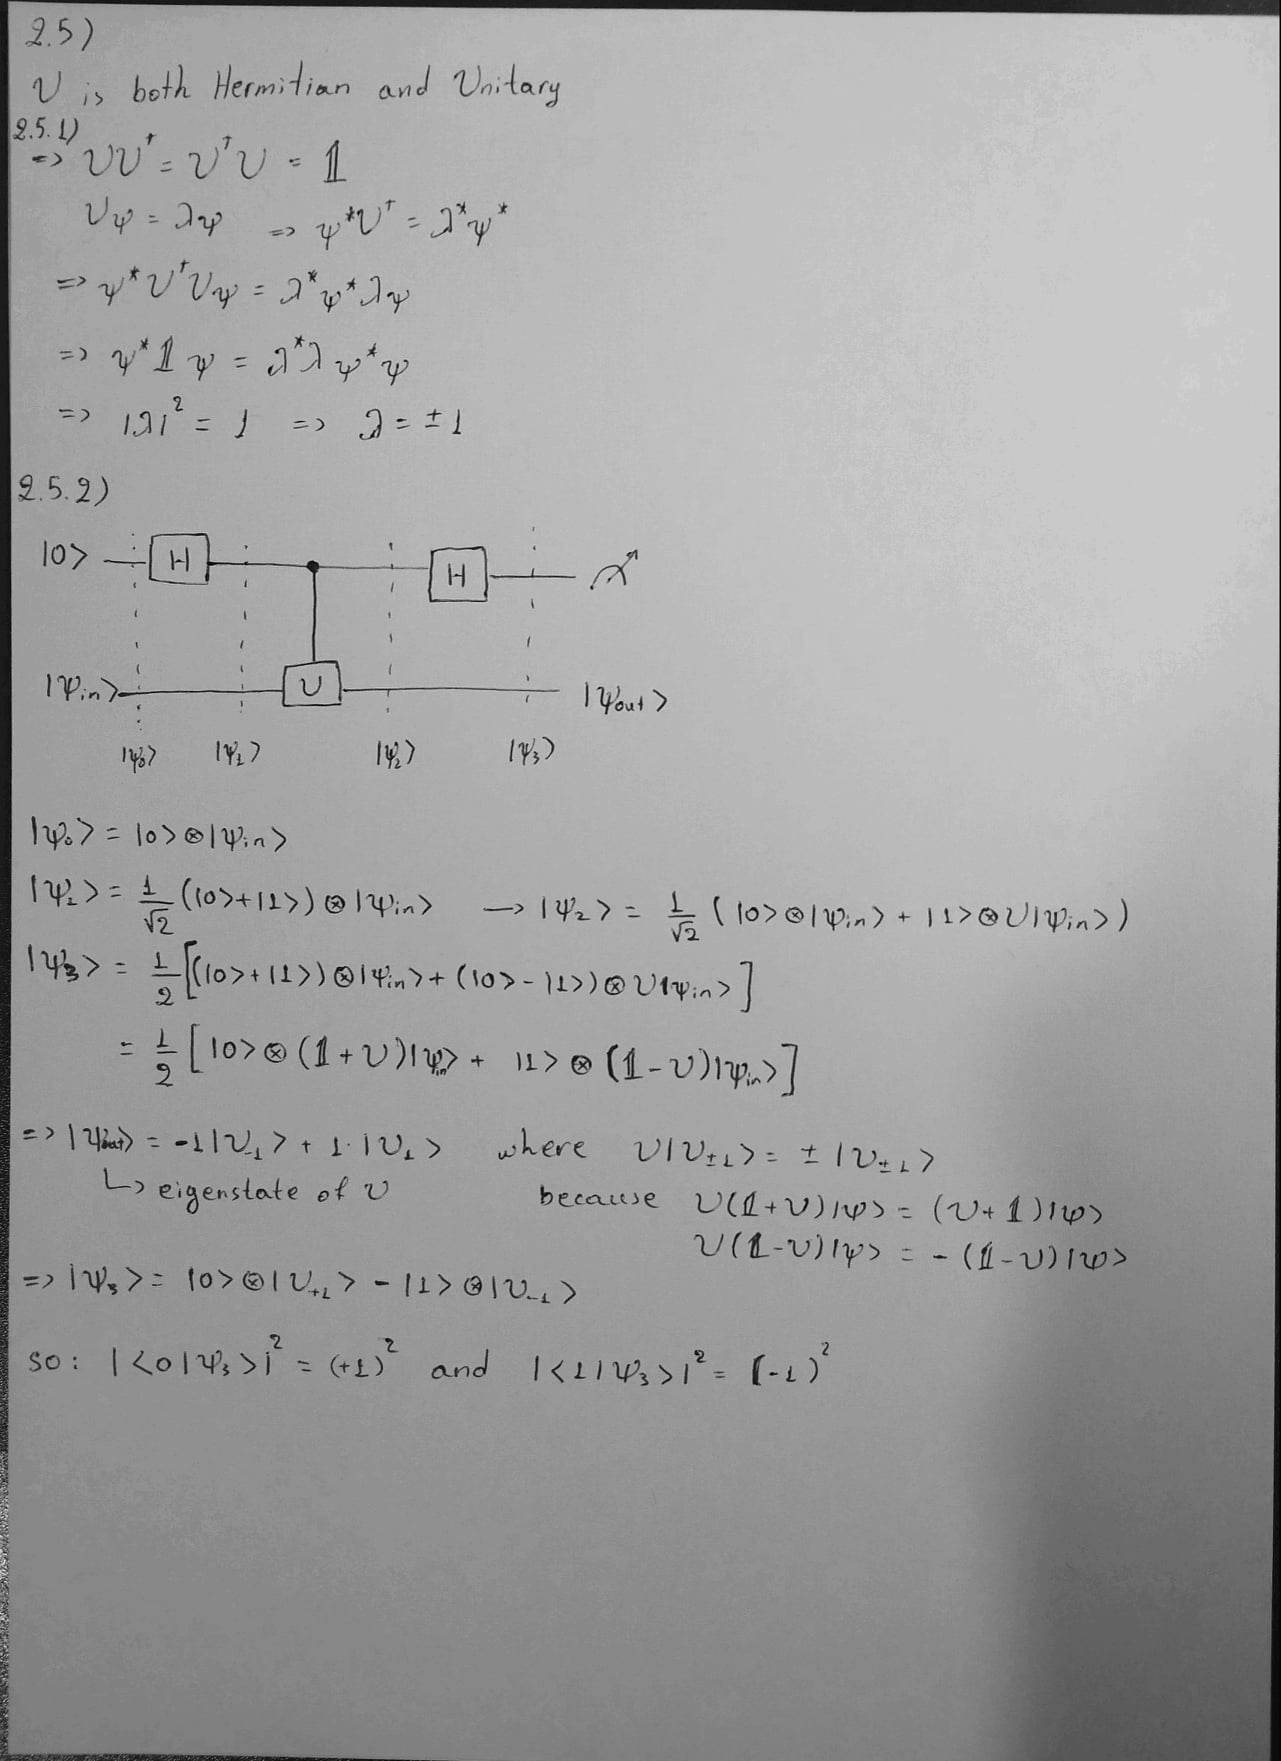